In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))

In [3]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
crypto2_df = crypto_df.loc[crypto_df['IsTrading']==True,:]
crypto2_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
#Filter out columns that don't have numericdata
crypto2_df = crypto2_df.drop(columns=["IsTrading", "CoinName", "Unnamed: 0"])
crypto2_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [7]:
#Clean up any Null
crypto2_df = crypto2_df.dropna()
crypto2_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
#Filter for only coins that have been mined
mined_df = crypto2_df.loc[(crypto2_df["TotalCoinsMined"] > 0)]
mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
#Use get_dummies to create dummy variables and standardize table
final_df = pd.get_dummies(mined_df[['Algorithm', 'ProofType']])
final_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Scale the data to standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)

In [14]:
#Use PCA to perform dimensionality reduction
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[ 1.01647329e+00, -6.88639640e-01,  1.60824387e-15, ...,
        -1.12756282e-01,  1.43423439e-01, -1.11808809e-01],
       [ 1.01647329e+00, -6.88639640e-01,  1.91204411e-15, ...,
        -1.12756282e-01,  1.43423439e-01, -1.11808809e-01],
       [ 1.79064645e+00, -7.45814843e-01, -9.29141552e-18, ...,
        -2.21139793e-01, -3.98762910e-01,  7.80831692e-03],
       ...,
       [-2.28381334e+00,  4.85356512e-01, -1.53551776e-15, ...,
         1.99161950e-02,  3.76066593e-01,  6.21368269e-02],
       [-2.05188776e+00,  4.62118225e-01, -6.98460519e-16, ...,
        -1.04391337e-01,  3.47950915e-01,  8.10869349e-02],
       [ 8.11198959e-01, -3.08884871e-01,  1.68764652e-15, ...,
         5.12509400e-01,  1.01548191e+00, -5.09881634e-02]])

In [15]:
#Further reduce with t-SNE
tsne = TSNE(learning_rate=150)
tsne_features = tsne.fit_transform(pca_data)
tsne_features

array([[-10.465356  ,   0.18832456],
       [-10.785677  ,   0.6590523 ],
       [-19.05696   ,   5.5766807 ],
       ...,
       [ 23.521872  ,   1.5794216 ],
       [ 15.98984   ,  -5.866366  ],
       [  0.8721066 ,   9.940155  ]], dtype=float32)

In [16]:
final_df['x'] = tsne_features[:,0]
final_df['y'] = tsne_features[:,1]

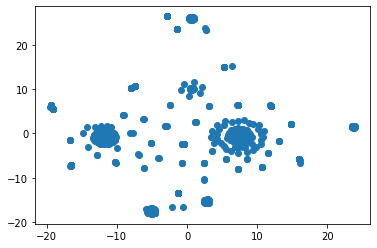

In [17]:
#Use Scatter plot to show results
plt.scatter(final_df['x'], final_df['y'])
plt.show()

# Analysis

#### There are multiple clusters represented in the above plot.With this in mind we can see the data is speratic

In [18]:
#Using k-means to create elbow plot
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(final_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,116192.492188
1,2,70837.687500
2,3,39491.773438
3,4,23104.943359
4,5,17283.882812


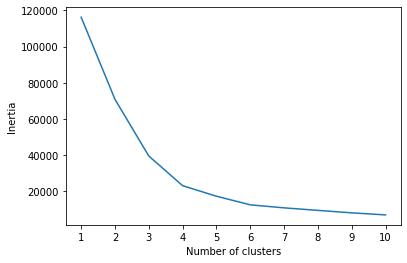

In [19]:
#Create elbow plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [21]:
clusters = get_clusters(4, final_df)
clusters

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,x,y,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-10.465356,0.188325,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-10.785677,0.659052,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-19.056959,5.576681,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.836526,26.310701,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14.742220,2.051884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.537975,23.724506,3
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-11.170715,-0.222896,1
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23.521872,1.579422,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15.989840,-5.866366,0


In [22]:
#Create plot
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.show()

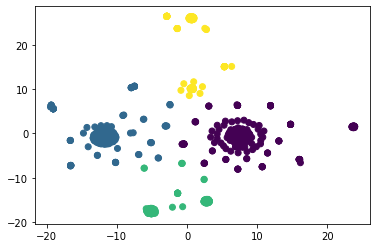

In [23]:
show_clusters(clusters)

# Final Analysis

#### From the plot above the clusters where seprated into 4 clusters with two showing to be bigger while the rest are not much as cluster only speratic. Its recommended that the clinet focus on the purple cluster than the smaller cluser if they are wishing to increase there gains.